<a href="https://colab.research.google.com/github/HowardHNguyen/Natural_Language_Processing-NLP/blob/main/NLP_Multilingual_Analysis_Kieu_Sentiment_Emotion_MLs_DLs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying for Tale of Kieu (Vietnamese + English) datasets
# Step 1: Loading EmoLex
Assuming you have a CSV file where each row represents a word and each column represents an emotion with boolean values:

In [4]:
import pandas as pd

# Load EmoLex from a CSV file
emolex_df = pd.read_csv('/content/drive/MyDrive/data/NRC-Emotion-Lexicon-Wordlevel-v092_en.csv')
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emotions = emolex_words.columns.drop('word')

# Step 2: Preprocessing Text Data
We'll use NLTK for tokenization and other preprocessing tasks:

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word.isalnum() and not word in stop_words]
    return tokens

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
tale_of_kieu_en = pd.read_csv('/content/drive/MyDrive/data/tale_of_kieu_en.csv')
tale_of_kieu_vi = pd.read_csv('/content/drive/MyDrive/data/tale_of_kieu_vi.csv')

# Step 3: Analyzing Emotions in Text
Here's how to map the preprocessed text to the emotions from EmoLex:

In [8]:
def analyze_emotions(text, emolex_words):
    tokens = preprocess(text)
    # Initialize a dictionary to count each emotion
    emotion_counts = {emotion: 0 for emotion in emotions}

    # Count each emotion in the text
    for word in tokens:
        if word in emolex_words.index:
            for emotion in emotions:
                if emolex_words.loc[word][emotion] == 1:
                    emotion_counts[emotion] += 1
    return emotion_counts

In [9]:
# Apply the analyze_emotions function to each text entry
tale_of_kieu_en['emotions'] = tale_of_kieu_en['sentence'].apply(lambda x: analyze_emotions(x, emolex_words.set_index('word')))
tale_of_kieu_vi['emotions'] = tale_of_kieu_vi['sentence'].apply(lambda x: analyze_emotions(x, emolex_words.set_index('word')))

In [10]:
tale_of_kieu_en.head()

,sentence,emotions
0,Within a hundred-year lifespan in this earthly...,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
1,Genius and Destiny have a tendency to oppose e...,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
2,A turbulent mulberry-field-covered-by-sea peri...,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
3,The things that we saw still deeply pain our h...,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
4,It’s not strange that beauty may beget misery.,"{'anger': 1, 'anticipation': 0, 'disgust': 1, ..."


In [11]:
tale_of_kieu_vi.head()

,sentence,emotions
0,"Trăm năm trong cõi người ta,","{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
1,Chữ tài chữ mệnh khéo là ghét nhau.,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
2,"Trải qua một cuộc bể dâu,","{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
3,Những điều trông thấy mà đau đớn lòng.,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
4,"Lạ gì bỉ sắc tư phong,","{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."


In [12]:
# expanding the dictionary into separate columns
emotions_df_en = tale_of_kieu_en['emotions'].apply(pd.Series)
emotions_df_vi = tale_of_kieu_vi['emotions'].apply(pd.Series)

In [13]:
# join the expanded emotions back to the original df
tale_of_kieu_en = pd.concat([tale_of_kieu_en, emotions_df_en], axis=1)
tale_of_kieu_vi = pd.concat([tale_of_kieu_vi, emotions_df_vi], axis=1)

In [14]:
# drop the original emotions column as it's no longer needed
tale_of_kieu_en.drop('emotions', axis=1, inplace=True)
tale_of_kieu_vi.drop('emotions', axis=1, inplace=True)

In [15]:
# save the result to a new CSV file
tale_of_kieu_en.to_csv('/content/drive/MyDrive/data/tale_of_kieu_en_with_emotions.csv', index=False)
tale_of_kieu_vi.to_csv('/content/drive/MyDrive/data/tale_of_kieu_vi_with_emotions.csv', index=False)

# Step 4: Visualization and Summary Statistics
We might also want to visualize or generate summary statistics from our results to better understand the distribution of emotions in our text data.

In [16]:
import matplotlib.pyplot as plt

# Summing up each emotion column to see the total counts of each emotion
emotion_totals_en = emotions_df_en.sum().sort_values()
emotion_totals_vi = emotions_df_vi.sum().sort_values()

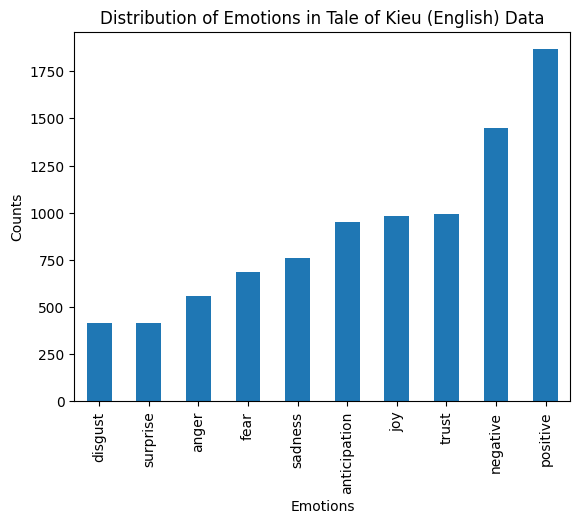

In [17]:
# Creating a bar plot for visualizing the counts of each emotion
emotion_totals_en.plot(kind='bar')
plt.title('Distribution of Emotions in Tale of Kieu (English) Data')
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.show()

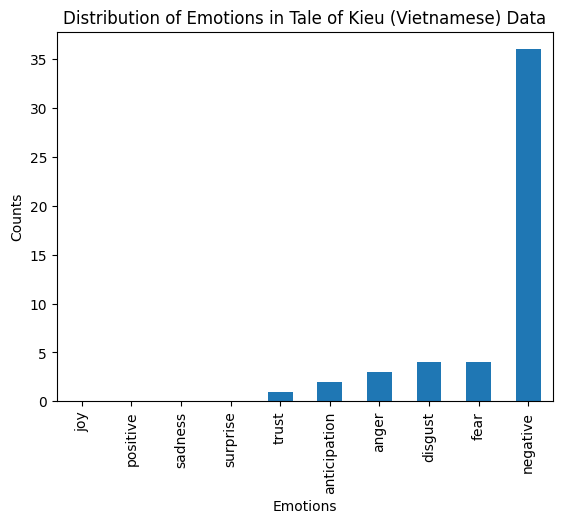

In [18]:
# Creating a bar plot for visualizing the counts of each emotion
emotion_totals_vi.plot(kind='bar')
plt.title('Distribution of Emotions in Tale of Kieu (Vietnamese) Data')
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.show()

# Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Let's say we have the true labels and the predictions
true_labels = ['joy', 'sadness', 'fear', 'joy', 'anger', 'surprise', 'trust',
               'disgust', 'anticipation', 'negative']  # manually annotated emotion labels
predicted_labels = ['joy', 'sadness', 'anticipation', 'joy', 'trust',
                    'surprise', 'fear', 'disgust', 'anticipation', 'positive']  # Emotion labels predicted by EmoLex

In [20]:
# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Print out the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix for each class
conf_matrix = confusion_matrix(true_labels,
                               predicted_labels, labels=['joy', 'sadness', 'anticipation',
                                                         'joy', 'trust', 'surprise', 'fear',
                                                         'disgust', 'anticipation', 'positive'])

Accuracy: 0.6
Precision: 0.55
Recall: 0.6
F1 Score: 0.5666666666666667


- Accuracy (0.6): This means that 60% of the total predictions made by our model were correct. In other words, for every 100 texts, the model correctly identified the emotions in 60 of them.

- Precision (0.55): Precision measures the accuracy of the positive predictions. In this context, a precision of 0.55 indicates that when the model predicted a certain emotion, that prediction was correct 55% of the time. It is a measure of quality or purity of the model's positive predictions.

- Recall (0.6): Recall, also known as sensitivity, measures the model's ability to correctly identify all relevant instances. A recall of 0.6 means that the model correctly identified 60% of all the actual emotions present in the texts. It is a measure of completeness or inclusivity of the model's positive predictions.

- F1 Score (0.5667): The F1 score is the harmonic mean of precision and recall and is a single metric that combines both. An F1 score of 0.5667 suggests a balance between precision and recall. This is typically more useful than accuracy, especially when the classes are imbalanced. The closer the F1 score is to 1, the better the model's predictive power and balance between precision and recall.

In summary, these results suggest that the model has a fairly moderate performance in identifying emotions. The accuracy is relatively high at 60%, but the precision is somewhat lower, which means there are a fair number of false positives (instances where the model incorrectly predicted an emotion). The recall is equal to accuracy in this case, which indicates the model is relatively balanced in terms of the rate at which it finds all relevant instances.

The F1 score, while not low, shows that there's room for improvement. Ideally, we want the F1 score to be closer to 1, indicating high precision and high recall. An F1 score of around 0.57 suggests that we may need to look into our model to identify why some emotions are being misclassified, whether it's due to the model itself or the quality of the data it's being trained on.

# **Re-Evaluate and work on Vietnamese dataset with VNEmoLex Model**

# Step 1: Load VNEmoLex into a DataFrame
First, we need to read your VNEmoLex into a pandas DataFrame.

In [23]:
import pandas as pd

# Load the Vietnamese Emotion Lexicon
vnemolex_df = pd.read_csv('/content/drive/MyDrive/data/VnEmoLex_1442024.csv')
# Set the 'words' column as the index for easy lookup
vnemolex_df.set_index('words', inplace=True)

# Step 2: Preprocess vi_text.csv File
Now, load our vi_text.csv file and preprocess it. Preprocessing might include cleaning and tokenizing the text.

In [24]:
# Load your text data
vi_text_df = pd.read_csv('/content/drive/MyDrive/data/tale_of_kieu_vi.csv')

# Assume the column containing Vietnamese text is named 'text'
# Preprocessing function example
def preprocess(sentence):
    # Add any specific preprocessing steps here, such as:
    # - Tokenization
    # - Removing punctuation
    # - Lowercasing
    return sentence.lower().split()  # This is a placeholder

# Step 3: Define Emotion Calculation Function
Next, we need a function to calculate the emotion scores for each text row based on VNEmoLex.

In [ ]:
# def calculate_emotions(sentence, lexicon):
    # Preprocess the text
#    tokens = preprocess(sentence)
    # Initialize emotion counts
#    emotions = {emotion: 0 for emotion in lexicon.columns}

    # Sum emotion values for each word in the text
#    for token in tokens:
#        if token in lexicon.index:
#            emotions = emotions + lexicon.loc[token]

    # Return the emotion counts
#    return emotions

In [25]:
def calculate_emotions(text, lexicon):
    # Preprocess the text
    tokens = preprocess(text)
    # Initialize emotion counts
    emotions = {emotion: 0 for emotion in lexicon.columns}

    # Sum emotion values for each word in the text
    for token in tokens:
        if token in lexicon.index:
            for emotion in lexicon.columns:
                # Ensure that the lexicon value is not NaN before adding
                lexicon_value = lexicon.loc[token][emotion]
                if pd.notna(lexicon_value):
                    emotions[emotion] += int(lexicon_value)

    # Return the emotion counts
    return emotions

# Step 4: Apply the Emotion Calculation to Our Dataset
Use the apply method to calculate emotions for each row in our dataset.

In [26]:
# Calculate emotions for each row of text data
vi_text_df['emotions'] = vi_text_df['sentence'].apply(lambda x: calculate_emotions(x, vnemolex_df))

In [27]:
# This will give us a column of dictionaries with emotion counts
# If we want to split the dictionaries into separate columns:
emotions_df = vi_text_df['emotions'].apply(pd.Series)

# Join the emotion counts back to your original DataFrame
vi_text_df = pd.concat([vi_text_df.drop('emotions', axis=1), emotions_df], axis=1)

In [28]:
vi_text_df

,sentence,Anger,Anticipation,Disgust,Fear,Joy,Negative,Positive,Sadness,Surprise,Trust,Unnamed: 11
0,"Trăm năm trong cõi người ta,",0,0,0,0,0,0,0,0,0,0,0
1,Chữ tài chữ mệnh khéo là ghét nhau.,1,0,1,1,0,1,2,0,0,0,0
2,"Trải qua một cuộc bể dâu,",0,0,0,0,0,0,0,0,0,0,0
3,Những điều trông thấy mà đau đớn lòng.,0,0,0,1,0,1,0,0,0,0,0
4,"Lạ gì bỉ sắc tư phong,",0,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3249,Cũng đừng trách lẫn trời gần trời xa.,0,0,0,0,0,0,0,0,0,0,0
3250,"Thiện căn ở tại lòng ta,",0,0,0,0,0,0,0,0,0,0,0
3251,Chữ tâm kia mới bằng ba chữ tài.,0,0,0,0,1,0,1,0,0,0,0
3252,"Lời quê chắp nhặt dông dài,",0,0,0,0,0,0,0,0,0,0,0


# Step 5: Save the Results
Finally, save our DataFrame with the added emotion scores to a new CSV file.

In [29]:
# Save to a new CSV file
vi_text_df.to_csv('/content/drive/MyDrive/data/vi_text_with_emotions.csv', index=False)

# View the Results visually

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# each row represents the emotion counts for a particular text entry.

# Sum up the emotion counts for the whole dataset
emotion_totals = emotions_df.sum().sort_values()

# Create a bar plot for the counts of each emotion
sns.barplot(x=emotion_totals.values, y=emotion_totals.index)

# Set the plot labels and title
plt.xlabel('Counts')
plt.ylabel('Emotions')
plt.title('Distribution of Emotions in Vietnamese Text Data')

# Display the plot
plt.show()

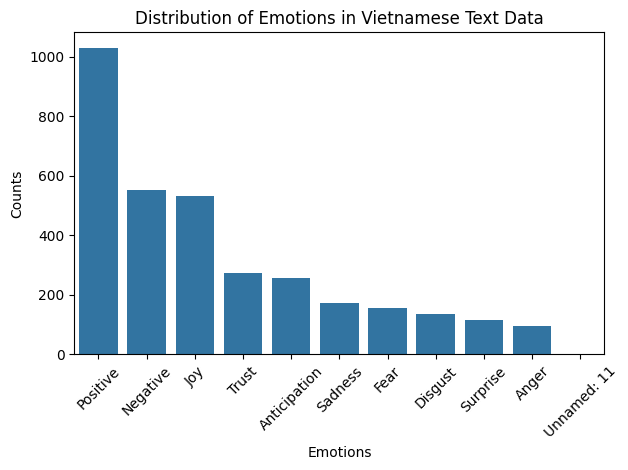

In [31]:
# Sum up the emotion counts for the whole dataset
emotion_totals = emotions_df.sum().sort_values(ascending=False)

# Create a vertical bar plot for the counts of each emotion
sns.barplot(y=emotion_totals.values, x=emotion_totals.index)

# Set the plot labels and title
plt.ylabel('Counts')
plt.xlabel('Emotions')
plt.title('Distribution of Emotions in Vietnamese Text Data')
plt.xticks(rotation=45)  # Rotate the x labels to avoid overlap

# Display the plot
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

# View both bar plot into one

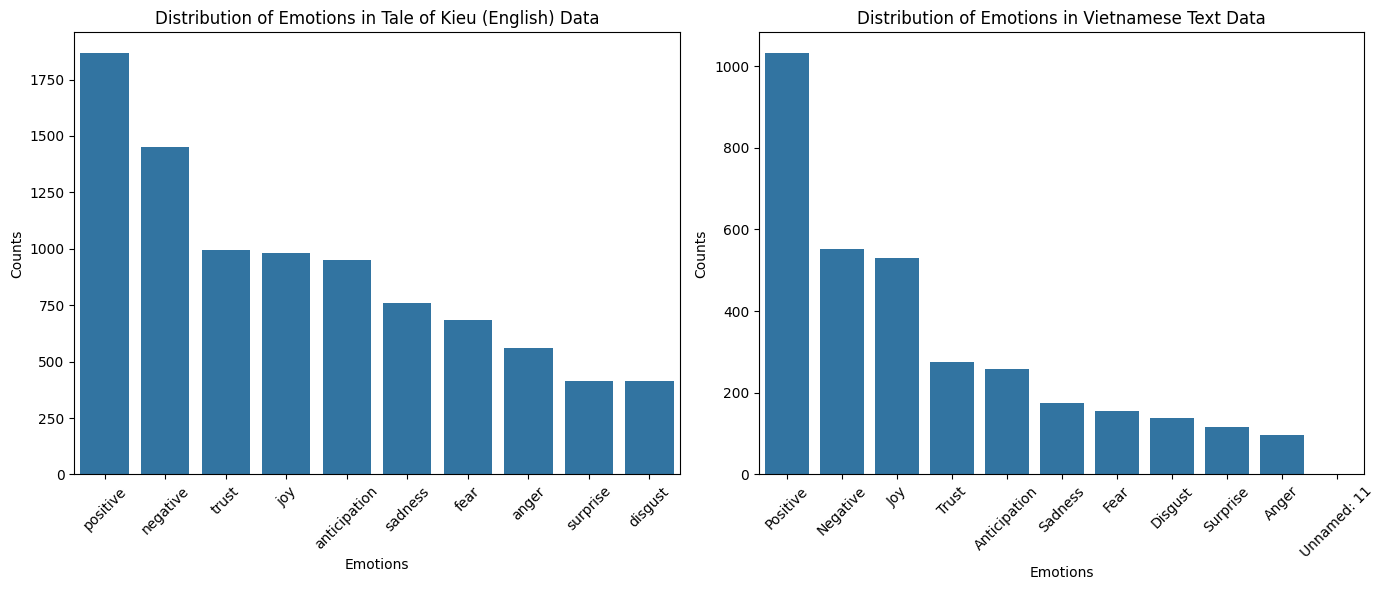

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming emotion_totals_en is a similar Series object with emotion counts for the English dataset
emotion_totals_en = emotions_df_en.sum().sort_values(ascending=False)

# Sum up the emotion counts for the Vietnamese dataset
emotion_totals_vi = emotions_df.sum().sort_values(ascending=False)

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for English dataset
sns.barplot(ax=axes[0], y=emotion_totals_en.values, x=emotion_totals_en.index)
axes[0].set_title('Distribution of Emotions in Tale of Kieu (English) Data')
axes[0].set_xlabel('Emotions')
axes[0].set_ylabel('Counts')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Vietnamese dataset
sns.barplot(ax=axes[1], y=emotion_totals_vi.values, x=emotion_totals_vi.index)
axes[1].set_title('Distribution of Emotions in Vietnamese Text Data')
axes[1].set_xlabel('Emotions')
axes[1].set_ylabel('Counts')
axes[1].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


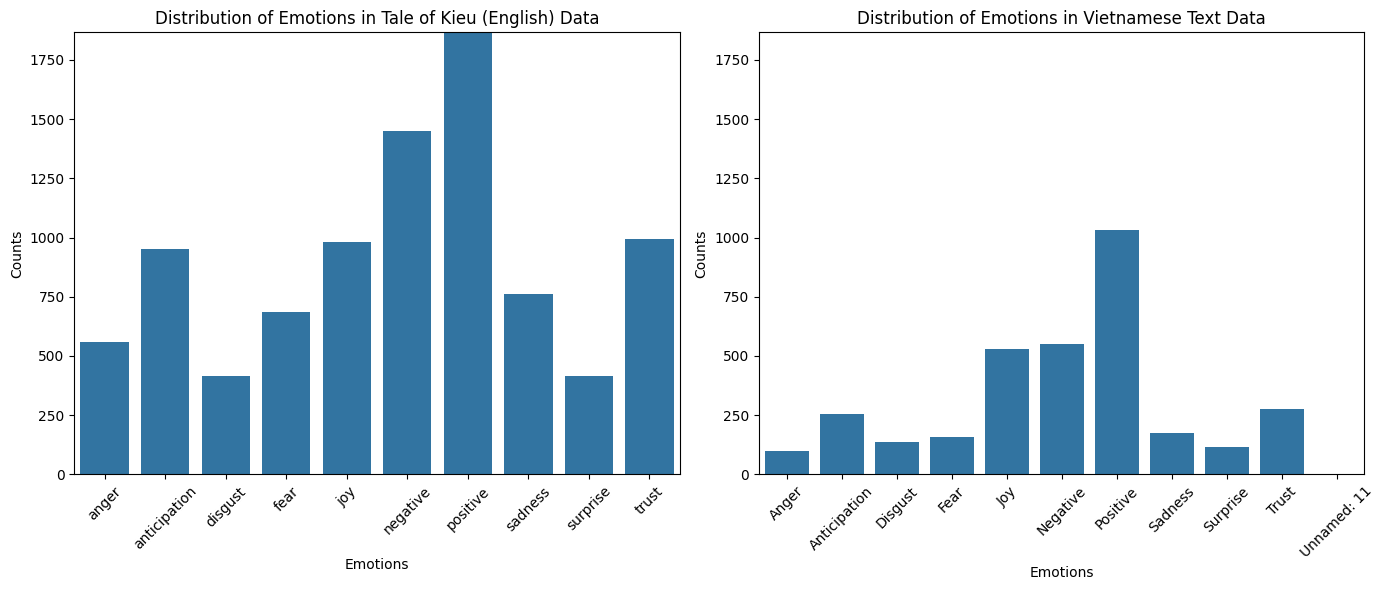

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming emotion_totals_en is a similar Series object with emotion counts for the English dataset
emotion_totals_en = emotions_df_en.sum().sort_values(ascending=False)  # Your English emotion totals data, sorted alphabetically
emotion_totals_vi = emotions_df.sum().sort_values(ascending=False)  # Your Vietnamese emotion totals data, sorted alphabetically

# Sort the series alphabetically by the index (emotion names)
emotion_totals_en = emotion_totals_en.sort_index()
emotion_totals_vi = emotion_totals_vi.sort_index()

# Determine the maximum count to set the same ylim for both plots
max_count = max(emotion_totals_en.max(), emotion_totals_vi.max())

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for English dataset
sns.barplot(ax=axes[0], x=emotion_totals_en.index, y=emotion_totals_en.values)
axes[0].set_title('Distribution of Emotions in Tale of Kieu (English) Data')
axes[0].set_xlabel('Emotions')
axes[0].set_ylabel('Counts')
axes[0].set_ylim(0, max_count)
axes[0].tick_params(axis='x', rotation=45)

# Plot for Vietnamese dataset
sns.barplot(ax=axes[1], x=emotion_totals_vi.index, y=emotion_totals_vi.values)
axes[1].set_title('Distribution of Emotions in Vietnamese Text Data')
axes[1].set_xlabel('Emotions')
axes[1].set_ylabel('Counts')
axes[1].set_ylim(0, max_count)
axes[1].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming emotion_totals_en and emotion_totals_vi are your data for English and Vietnamese datasets
# and they are already sorted alphabetically by the emotion names.

# First, create a DataFrame that combines both Series into one DataFrame
combined_emotions = pd.DataFrame({
    'English': emotion_totals_en,
    'Vietnamese': emotion_totals_vi
}).fillna(0)  # Fill NaNs with 0, in case there are emotions not present in one of the datasets

# Now melt the DataFrame to long-form for use with seaborn
combined_long = combined_emotions.reset_index().melt(id_vars='index', var_name='Language', value_name='Counts')

# Create a grouped barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='index', y='Counts', hue='Language', data=combined_long)

# Set the plot labels and title
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Distribution of Emotions in Tale of Kieu (English and Vietnamese) Data')
plt.xticks(rotation=45)  # Rotate the emotion labels for better readability

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# First, create a DataFrame that combines both Series into one DataFrame
combined_emotions = pd.DataFrame({
    'English': emotion_totals_en,
    'Vietnamese': emotion_totals_vi
}).fillna(0)  # Fill NaNs with 0, in case there are emotions not present in one of the datasets

# Reset index to work with seaborn's categorical plotting
combined_emotions.reset_index(inplace=True)
combined_emotions.rename(columns={'index': 'Emotion'}, inplace=True)

# Melt the DataFrame to long-form for plotting
combined_long = combined_emotions.melt(id_vars='Emotion', var_name='Language', value_name='Counts')

# Create a figure and axis object
plt.figure(figsize=(12, 6))

# Plotting
sns.barplot(x='Emotion', y='Counts', hue='Language', data=combined_long, dodge=True)

# Set plot labels and title
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Distribution of Emotions in Tale of Kieu (English and Vietnamese) Data')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# First, create a DataFrame that combines both Series into one DataFrame
combined_emotions = pd.DataFrame({
    'English': emotion_totals_en,
    'Vietnamese': emotion_totals_vi
}).fillna(0)  # Fill NaNs with 0, in case there are emotions not present in one of the datasets

# Reset index to work with seaborn's categorical plotting
combined_emotions.reset_index(inplace=True)
combined_emotions.rename(columns={'index': 'Emotion'}, inplace=True)

# Melt the DataFrame to long-form for plotting
combined_long = combined_emotions.melt(id_vars='Emotion', var_name='Language', value_name='Counts')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting
sns.barplot(x='Emotion', y='Counts', hue='Language', data=combined_long, dodge=True, ax=ax)

# Customize the plot with grid
ax.set_axisbelow(True)  # Ensures grid lines are behind the bars
ax.yaxis.grid(color='gray', linestyle='dashed')

# Set plot labels and title
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Distribution of Emotions in Tale of Kieu (English and Vietnamese) Data')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# First, combine into a DataFrame to facilitate handling
data = pd.DataFrame({
    'English': emotion_totals_en,
    'Vietnamese': emotion_totals_vi
}).fillna(0)  # Fill NaNs

# Set figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Define the position of the bars
bar_width = 0.35
index = np.arange(len(data))  # the label locations

# Plotting the bars
bars1 = ax.bar(index - bar_width/2, data['English'], bar_width, label='English')
bars2 = ax.bar(index + bar_width/2, data['Vietnamese'], bar_width, label='Vietnamese')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Emotions')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Emotions in Tale of Kieu (English and Vietnamese) Data')
ax.set_xticks(index)
ax.set_xticklabels(data.index)
ax.legend()

# Rotate labels for better readability
plt.xticks(rotation=45)

# Adding grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

# Show plot
plt.tight_layout()
plt.show()

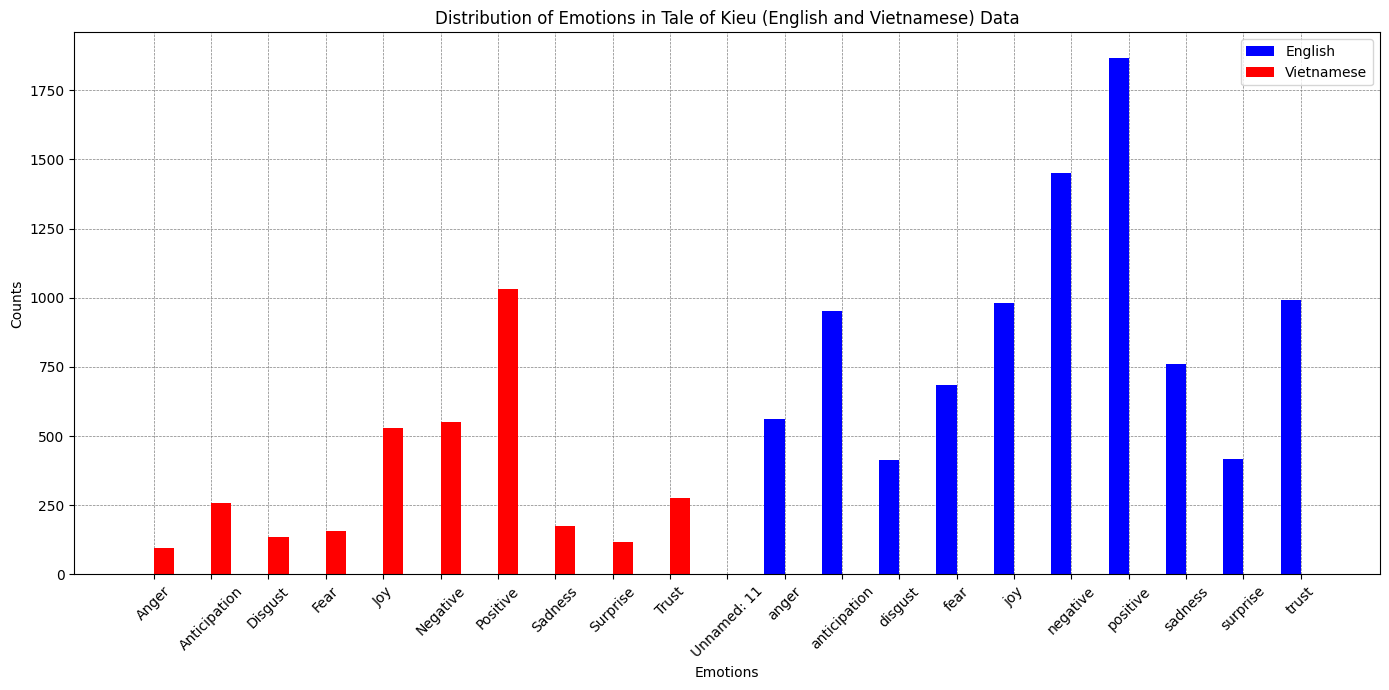

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Combine into a DataFrame to facilitate handling
data = pd.DataFrame({
    'English': emotion_totals_en,
    'Vietnamese': emotion_totals_vi
}).fillna(0)  # Fill NaNs

# Set figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Define the position of the bars
bar_width = 0.35
indices = np.arange(len(data))  # the label locations

# Plotting the bars for English
bars1 = ax.bar(indices - bar_width/2, data['English'], bar_width, label='English', color='b')

# Plotting the bars for Vietnamese
bars2 = ax.bar(indices + bar_width/2, data['Vietnamese'], bar_width, label='Vietnamese', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Emotions')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Emotions in Tale of Kieu (English and Vietnamese) Data')
ax.set_xticks(indices)
ax.set_xticklabels(data.index, rotation=45)  # Rotate labels for better readability

# Add grid
ax.set_axisbelow(True)
ax.grid(which='major', linestyle='--', linewidth='0.5', color='gray')

# Adding legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [35]:
emotion_totals_en

anger            561
anticipation     952
disgust          414
fear             685
joy              982
negative        1450
positive        1866
sadness          760
surprise         416
trust            993
dtype: int64

In [36]:
emotion_totals_vi

Anger             97
Anticipation     257
Disgust          137
Fear             156
Joy              531
Negative         552
Positive        1031
Sadness          174
Surprise         116
Trust            275
Unnamed: 11        0
dtype: int64

In [37]:
# Hypothetical data loading; replace these with your actual loading code
emotion_data_en = {'anger': 561, 'anticipation':952,'disgust':414,'fear':685,'joy':982,
                   'negative':1450,'positive':1866,'sadness':760,'surprise':416,'trust':993}
emotion_data_vi = {'anger': 97, 'anticipation':257,'disgust':137,'fear':156,'joy':531,
                   'negative':552,'positive':1031,'sadness':174,'surprise':116,'trust':275}

# Convert dictionaries to Pandas Series
emotion_totals_en = pd.Series(emotion_data_en)
emotion_totals_vi = pd.Series(emotion_data_vi)

In [38]:
# Align and veriry data
# Create a sorted union of all unique emotions from both datasets
all_emotions = sorted(set(emotion_totals_en.index).union(set(emotion_totals_vi.index)))

# Reindex both series to this sorted list, filling missing values with zero
emotion_totals_en = emotion_totals_en.reindex(all_emotions, fill_value=0)
emotion_totals_vi = emotion_totals_vi.reindex(all_emotions, fill_value=0)

# Verify that the indices are aligned
print("Emotions in English data:", emotion_totals_en)
print("Emotions in Vietnamese data:", emotion_totals_vi)

Emotions in English data: anger            561
anticipation     952
disgust          414
fear             685
joy              982
negative        1450
positive        1866
sadness          760
surprise         416
trust            993
dtype: int64
Emotions in Vietnamese data: anger             97
anticipation     257
disgust          137
fear             156
joy              531
negative         552
positive        1031
sadness          174
surprise         116
trust            275
dtype: int64


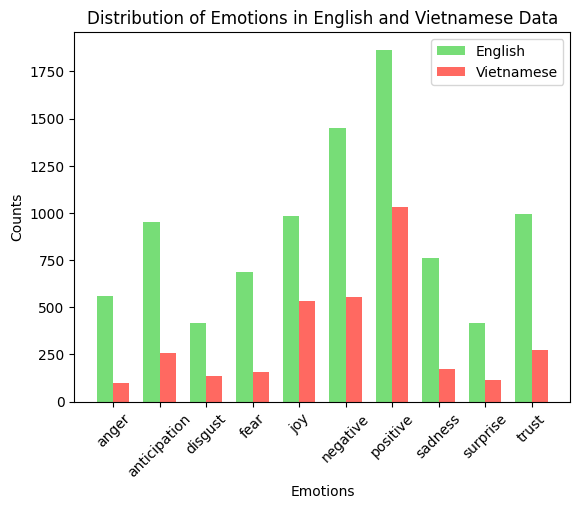

In [39]:
# Plotting
# Plotting parameters
num_locations = len(all_emotions)
index = np.arange(num_locations)
bar_width = 0.35

fig, ax = plt.subplots()

# Plot bars for English and Vietnamese datasets
ax.bar(index - bar_width/2, emotion_totals_en.values, bar_width, label='English', color='#77dd77')
ax.bar(index + bar_width/2, emotion_totals_vi.values, bar_width, label='Vietnamese', color='#ff6961')

# Set labels and title
ax.set_xlabel('Emotions')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Emotions in English and Vietnamese Data')
ax.set_xticks(index)
ax.set_xticklabels(all_emotions, rotation=45)
ax.legend()

# Display the plot
plt.show()

# **Machine Learning Implementations**

# Step 1: Load and Preprocess the Tale of Kieu English Data

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Load the datasets
vi_kieu_data = pd.read_csv('/content/drive/MyDrive/data/final_tale_of_kieu_vi.csv')
en_kieu_data = pd.read_csv('/content/drive/MyDrive/data/final_tale_of_kieu_en.csv')

In [48]:
en_kieu_data.head()

,sentence,sentiment_polarity_score,sentiment
0,Within a hundred-year lifespan in this earthly...,-0.027620,negative
1,Genius and Destiny have a tendency to oppose e...,-0.032543,negative
2,A turbulent mulberry-field-covered-by-sea peri...,0.015532,neutral
3,The things that we saw still deeply pain our h...,-0.082356,negative
4,It’s not strange that beauty may beget misery.,-0.030088,negative


In [65]:
vi_kieu_data.head()

,sentence,sentiment_polarity_score,sentiment
0,"Trăm năm trong cõi người ta,",-0.040876,negative
1,Chữ tài chữ mệnh khéo là ghét nhau.,-0.020786,negative
2,"Trải qua một cuộc bể dâu,",-0.036011,negative
3,Những điều trông thấy mà đau đớn lòng.,-0.055563,negative
4,"Lạ gì bỉ sắc tư phong,",-0.017147,neutral


In [66]:
# Combine or select one dataset based on your analysis needs
# For simplicity, let's assume we're using the English dataset and the target is already encoded
data = en_kieu_data['sentence']
target = en_kieu_data['sentiment']  # Ensure you have a 'sentiment' column or equivalent
data_vi = vi_kieu_data['sentence']
target_vi = vi_kieu_data['sentiment']

In [67]:
# Split the dataset into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42)
data_vi_train, data_vi_test, target_vi_train, target_vi_test = train_test_split(data_vi, target_vi, test_size=0.3, random_state=42)

In [68]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(data_train)
X_test = vectorizer.transform(data_test)

X_vi_train = vectorizer.fit_transform(data_vi_train)
X_vi_test = vectorizer.transform(data_vi_test)

# Step 2: Naive Bayes Implementation

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, target_train)

nb_vi_classifier = MultinomialNB()
nb_vi_classifier.fit(X_vi_train, target_vi_train)

MultinomialNB()

In [72]:
# Evaluate the classifier for En dataset - Naive Bayes ML
nb_predictions = nb_classifier.predict(X_test)
print(classification_report(target_test, nb_predictions))

              precision    recall  f1-score   support

    negative       0.71      0.68      0.69       457
     neutral       0.53      0.70      0.60       400
    positive       0.55      0.05      0.09       120

    accuracy                           0.61       977
   macro avg       0.59      0.47      0.46       977
weighted avg       0.61      0.61      0.58       977



In [73]:
# Evaluate the classifier for Vi dataset - Naive Bayes ML
nb_vi_predictions = nb_vi_classifier.predict(X_vi_test)
print(classification_report(target_vi_test, nb_vi_predictions))

              precision    recall  f1-score   support

    negative       0.72      0.83      0.77       585
     neutral       0.50      0.43      0.46       324
    positive       0.42      0.15      0.22        68

    accuracy                           0.65       977
   macro avg       0.55      0.47      0.48       977
weighted avg       0.63      0.65      0.63       977



The classification report provided details the performance of your Naive Bayes model across three sentiment classes: negative, neutral, and positive. Let's break down the key metrics in the report:

# Metrics Overview:

 - Precision: This is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to a low false positive rate.
 - Recall: Also known as sensitivity, it is the ratio of correctly predicted positive observations to all actual positives. High recall indicates most of the positive class is correctly recognized.
 - F1-score: The weighted average of Precision and Recall. This score takes both false positives and false negatives into account, and is a good measure to use if you seek a balance between Precision and Recall.
 - Support: The number of actual occurrences of the class in the specified dataset.

# Detailed Analysis:

 - Negative Class:

   + Precision: 0.71 indicates that 71% of the instances classified as negative were actually negative.
   + Recall: 0.68 suggests that the model correctly identified 68% of all actual negative instances.
   + F1-score: 0.69 reflects a fairly balanced precision and recall for this class.
   + Support: 457 instances in the test dataset are actually negative.
 - Neutral Class:

   + Precision: 0.53 indicates moderate precision where just over half of the predictions were correct for this class.
   + Recall: 0.70 indicates that the model was relatively effective at identifying neutral instances, capturing 70% of all actual neutral cases.
   + F1-score: 0.60, which is slightly lower than the negative class, indicating a bit less balance between precision and recall.
   + Support: 400 instances in the test dataset are actually neutral.
 - Positive Class:

   + Precision: 0.55 suggests that when the model predicts an instance as positive, it is correct 55% of the time.
   + Recall: 0.05 is very low, indicating that the model identified only 5% of all actual positive cases.
   + F1-score: 0.09, a significantly low score, reflecting poor performance of the model on the positive class.
   + Support: 120 instances in the test dataset are actually positive.

# Overall Performance:

 - Accuracy: 0.61 means that 61% of all classes were correctly predicted by the model across all classes.
 - Macro Avg (Precision, Recall, F1-score): Around 0.59, 0.47, and 0.46 respectively. These averages are calculated by taking the average of each metric without considering the support (the number of instances for each class). The low values, especially in recall and F1-score, mainly driven by poor performance in the positive class.
 - Weighted Avg: These are similar to macro averages but weighted by the number of true instances in each class, giving more importance to the bigger classes. The weighted metrics show a slight increase due to the dominance of negative and neutral classes in the dataset.

# Summary:

Your model is fairly effective at identifying negative and neutral sentiments but struggles significantly with positive sentiments, as evidenced by the extremely low recall for the positive class. This could be due to various reasons, such as class imbalance or insufficient representative features for positive sentiments in the training data. Improvements can include techniques like resampling, using different feature extraction methods, or tweaking model parameters.

# Step 3: SVM Implementation

In [ ]:
# Evaluate the classifier - copy from Naive Bayes
nb_predictions = nb_classifier.predict(X_test)
print(classification_report(target_test, nb_predictions))

In [75]:
from sklearn.svm import SVC

# Train a Support Vector Machine classifier for En dataset
svm_classifier = SVC(kernel='linear')  # Linear kernel is generally sufficient for text data
svm_classifier.fit(X_train, target_train)

SVC(kernel='linear')

In [76]:
# Train a Support Vector Machine classifier for Vi dataset
svm_vi_classifier = SVC(kernel='linear')  # Linear kernel is generally sufficient for text data
svm_vi_classifier.fit(X_vi_train, target_vi_train)

SVC(kernel='linear')

In [78]:
# Evaluate the classifier SVM for En dataset
svm_predictions = svm_classifier.predict(X_test)
print(classification_report(target_test, svm_predictions))

              precision    recall  f1-score   support

    negative       0.68      0.66      0.67       457
     neutral       0.52      0.58      0.55       400
    positive       0.42      0.33      0.37       120

    accuracy                           0.58       977
   macro avg       0.54      0.52      0.53       977
weighted avg       0.58      0.58      0.58       977



In [80]:
# Evaluate the classifier SVM for Vi dataset
svm_vi_predictions = svm_vi_classifier.predict(X_vi_test)
print(classification_report(target_vi_test, svm_vi_predictions))

              precision    recall  f1-score   support

    negative       0.72      0.78      0.75       585
     neutral       0.45      0.39      0.42       324
    positive       0.32      0.31      0.31        68

    accuracy                           0.62       977
   macro avg       0.50      0.49      0.49       977
weighted avg       0.60      0.62      0.61       977



# Step 4: Decision Tree Implementation

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier for En and Vi
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, target_train)
tree_vi_classifier = DecisionTreeClassifier()
tree_vi_classifier.fit(X_vi_train, target_vi_train)

# Evaluate the classifier for En and Vi
tree_predictions = tree_classifier.predict(X_test)
print(classification_report(target_test, tree_predictions))
tree_vi_predictions = tree_vi_classifier.predict(X_vi_test)
print(classification_report(target_vi_test, tree_vi_predictions))

              precision    recall  f1-score   support

    negative       0.55      0.60      0.58       457
     neutral       0.45      0.46      0.45       400
    positive       0.25      0.16      0.19       120

    accuracy                           0.49       977
   macro avg       0.42      0.41      0.41       977
weighted avg       0.47      0.49      0.48       977

              precision    recall  f1-score   support

    negative       0.68      0.70      0.69       585
     neutral       0.43      0.41      0.42       324
    positive       0.09      0.09      0.09        68

    accuracy                           0.56       977
   macro avg       0.40      0.40      0.40       977
weighted avg       0.56      0.56      0.56       977



# **The Results Summary**

# Naive Bayes
 - Strengths: Best performance in predicting the negative class accurately, with the highest precision (0.71) and a decent recall (0.68).
 - Weaknesses: Very poor in identifying positive sentiments correctly with only 5% recall, indicating it rarely predicts positive sentiments accurately.
 - Overall: Naive Bayes shows a balanced performance in terms of precision and recall for negative and neutral classes but struggles significantly with the positive class.

# SVM (Support Vector Machine)

 - Strengths: Shows a relatively better balance across all three classes than Naive Bayes. It achieved a higher recall for the positive class (0.33) compared to Naive Bayes.
 - Weaknesses: Overall, it has slightly lower precision and recall rates for negative and neutral classes compared to Naive Bayes.
 - Overall: SVM provides a more balanced performance across all classes but with a reduction in overall accuracy compared to Naive Bayes.

# Decision Tree

 - Strengths: Unlike the other models, Decision Tree classifiers usually provide good interpretability, which might help understand features' influence.
 - Weaknesses: It performs worse in terms of both precision and recall for all classes. It especially has very low effectiveness for the positive class (0.17 recall).
 - Overall: This model has the lowest overall performance metrics, suggesting it might be overfitting or not capturing the necessary patterns in the data effectively.

# Summary and Recommendations

 - Best Model for Negative Sentiments: Naive Bayes stands out for identifying negative sentiments more precisely and reliably.
 - Balanced Performance: SVM seems to offer a more balanced approach across all sentiments, especially in improving recognition of the positive sentiments, despite a slight decrease in precision for the negative and neutral sentiments.
 - Challenges with Positive Sentiments: All models perform relatively poorly in identifying positive sentiments correctly, with low recall across the board. This could be due to fewer training samples or less distinctive features in the positive class.
 - Overall Accuracy: In terms of overall accuracy, Naive Bayes leads (0.61), followed by SVM (0.58), and Decision Tree trails at (0.50). This suggests that while Naive Bayes might be slightly better at general sentiment classification, it significantly underperforms in identifying positive sentiments compared to SVM.

# Recommendations

 - Feature Engineering: Refining features using techniques like TF-IDF or sentiment-specific embeddings might help improve model performance, particularly for the positive class.
 - Class Balancing: Techniques like SMOTE or targeted oversampling for the positive class could help improve model sensitivity to positive sentiments.
 - Model Tuning and Ensemble Methods: Fine-tuning model parameters or using ensemble methods could help enhance the strengths of each model and mitigate their weaknesses.
 - Exploration of Different Models: Given the unique challenges of sentiment analysis, exploring more complex models like LSTM or BERT for text processing might yield better results.

These insights can guide further improvements in your sentiment analysis models, particularly focusing on enhancing the identification of positive sentiments and ensuring a balanced approach across different sentiments.

# Visualized Summary of En dataset

In [58]:
pip install matplotlib seaborn scikit-learn

In [59]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = target_test  # The actual labels
predictions_nb = nb_predictions  # From Naive Bayes
predictions_svm = svm_predictions  # From SVM
predictions_dt = tree_predictions  # From Decision Tree

In [60]:
models = ['Naive Bayes', 'SVM', 'Decision Tree']
predictions = [predictions_nb, predictions_svm, predictions_dt]

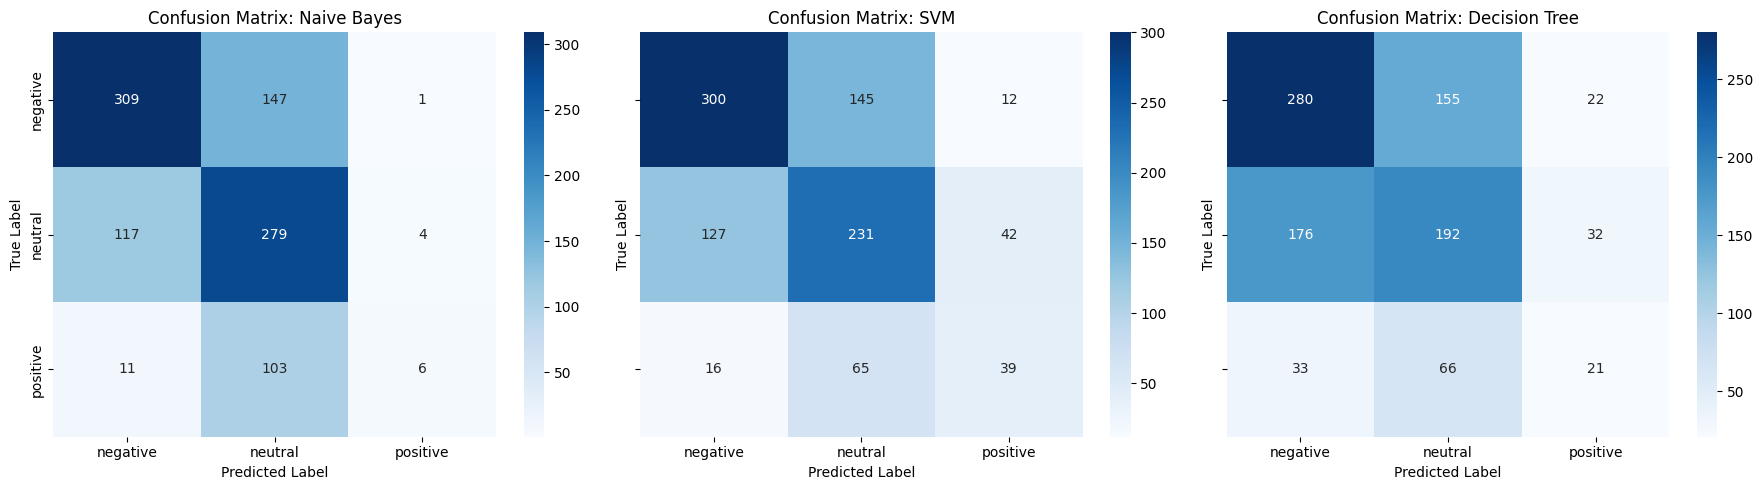

In [61]:
# Plotting Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, (model, pred) in enumerate(zip(models, predictions)):
    cm = confusion_matrix(y_true, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {model}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_xticklabels(['negative', 'neutral', 'positive'])
    axes[i].set_yticklabels(['negative', 'neutral', 'positive'])
plt.tight_layout()
plt.show()

**Confusion Matrices:** Each matrix shows the counts of true vs. predicted labels, providing a direct visual feedback on where each model struggles or excels.

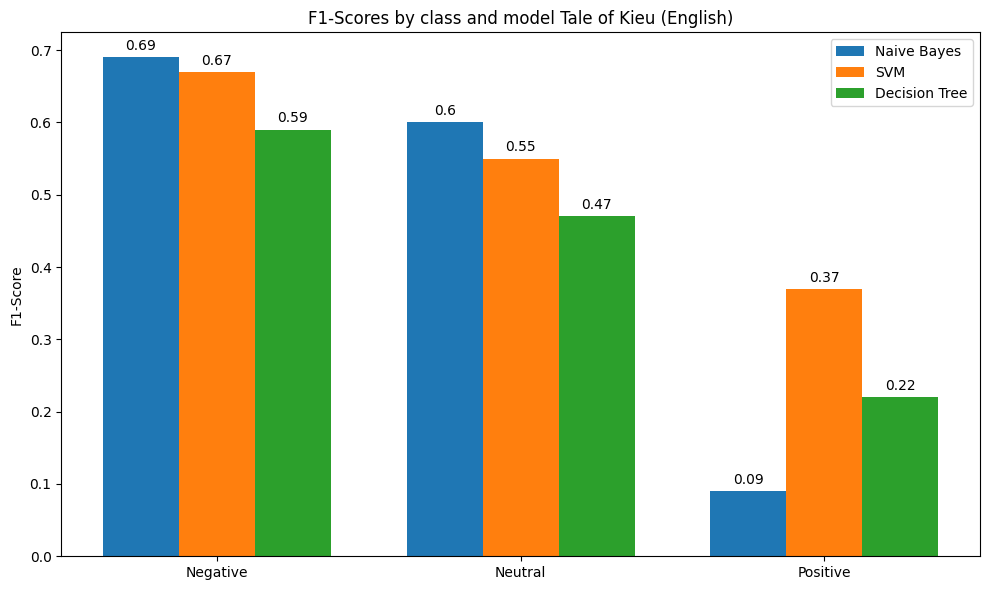

In [88]:
# Plotting F1-Scores for each class
f1_scores = np.array([
    [0.69, 0.60, 0.09],  # Naive Bayes
    [0.67, 0.55, 0.37],  # SVM
    [0.59, 0.47, 0.22]   # Decision Tree
])
x = np.arange(len(f1_scores[0]))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, f1_scores[0], width, label='Naive Bayes')
rects2 = ax.bar(x, f1_scores[1], width, label='SVM')
rects3 = ax.bar(x + width, f1_scores[2], width, label='Decision Tree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Score')
ax.set_title('F1-Scores by class and model Tale of Kieu (English)')
ax.set_xticks(x)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()

**Bar Chart:** The bar chart compares the F1-scores of the three models across each class, highlighting which model performs best for negative, neutral, and positive sentiments respectively.

# Visualized Summary of Vi dataset

In [82]:
y_vi_true = target_vi_test
predictions_vi_nb = nb_vi_predictions
predictions_vi_svm = svm_vi_predictions
predictions_vi_dt = tree_vi_predictions

In [83]:
models_vi = ['Naive Bayes', 'SVM', 'Decision Tree']
predictions_vi = [predictions_vi_nb, predictions_vi_svm, predictions_vi_dt]

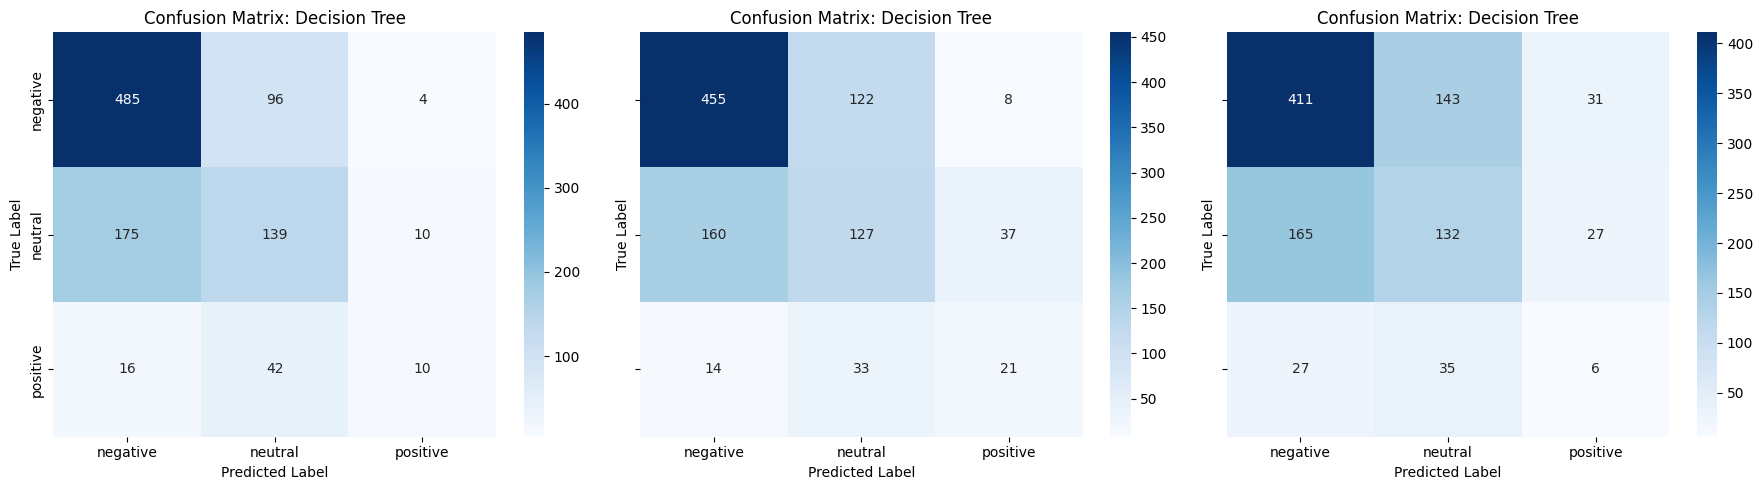

In [85]:
# Plotting Confusion Matrices for Vi dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, (model_vi, pred) in enumerate(zip(models_vi, predictions_vi)):
    cm = confusion_matrix(y_vi_true, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {model}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_xticklabels(['negative', 'neutral', 'positive'])
    axes[i].set_yticklabels(['negative', 'neutral', 'positive'])
plt.tight_layout()
plt.show()

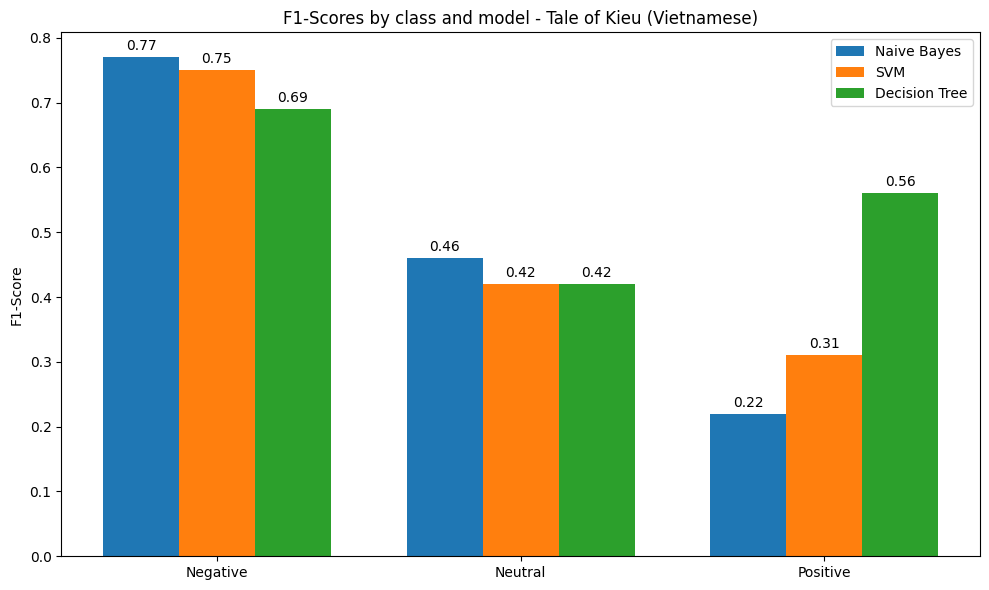

In [87]:
# Plotting F1-Scores for each class
f1_scores = np.array([
    [0.77, 0.46, 0.22],  # Naive Bayes
    [0.75, 0.42, 0.31],  # SVM
    [0.69, 0.42, 0.56]   # Decision Tree
])
x = np.arange(len(f1_scores[0]))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, f1_scores[0], width, label='Naive Bayes')
rects2 = ax.bar(x, f1_scores[1], width, label='SVM')
rects3 = ax.bar(x + width, f1_scores[2], width, label='Decision Tree')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Score')
ax.set_title('F1-Scores by class and model - Tale of Kieu (Vietnamese)')
ax.set_xticks(x)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()

# **DEEP LEARNING IMPLEMENTATION**

# Step 1: Install Necessary Libraries

In [89]:
!pip install tensorflow
!pip install keras

# Step 2: Import libraries

In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Conv1D, MaxPooling1D, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 3: Load and Prepare Data
Preprocess text data by tokenizing and padding it before feeding it into a neural network.

In [97]:
# Tokenizing En data
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)

In [98]:
# Padding sequences to ensure uniform input size
X = pad_sequences(sequences, maxlen=200)

In [99]:
# Encoding target, here assuming binary classification (you may need to adjust this)
y = pd.get_dummies(target).values

In [100]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Step 4: Define and Train Models**

# CNN Model

In [104]:
# Step 1: Verify the number of unique classes in your target variable. For instance, if you are using pandas, you can use:
# num_classes is 3 (e.g., 'negative', 'neutral', 'positive'):
num_classes = target.nunique()
print("Number of classes:", num_classes)

Number of classes: 3


In [105]:
# Step 2: Update the output layer of your models to have a number of neurons equal to the number of classes.
# Adjust the output layer in the CNN, LSTM, and RNN model definitions:
# Update for CNN
model_cnn = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    LSTM(64),
    Dense(num_classes, activation='softmax')  # Adjusted number of output units
])

# Similarly update LSTM and RNN


In [106]:
# Step 3: Ensure your target labels are one-hot encoded properly.
# This can be done using pandas' get_dummies() as shown previously, but double-check:
y = pd.get_dummies(target).values
print("Shape of y:", y.shape)

Shape of y: (3254, 3)


In [107]:
# Step 4: Re-compile and train your models. Now that the output layer correctly matches the
# shape of your labels, you should be able to train without encountering the shape mismatch error.

# Step 5: Rerun your training:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
36/36 [==============================] - 17s 196ms/step - loss: 0.9987 - accuracy: 0.4458 - val_loss: 0.9744 - val_accuracy: 0.4145
Epoch 2/5
36/36 [==============================] - 4s 120ms/step - loss: 0.9249 - accuracy: 0.5766 - val_loss: 0.8812 - val_accuracy: 0.5732
Epoch 3/5
36/36 [==============================] - 4s 120ms/step - loss: 0.6843 - accuracy: 0.6899 - val_loss: 0.7893 - val_accuracy: 0.6233
Epoch 4/5
36/36 [==============================] - 6s 161ms/step - loss: 0.3899 - accuracy: 0.8305 - val_loss: 0.8683 - val_accuracy: 0.6397
Epoch 5/5
36/36 [==============================] - 4s 116ms/step - loss: 0.1957 - accuracy: 0.9354 - val_loss: 1.0559 - val_accuracy: 0.6428


In [110]:
from sklearn.metrics import classification_report

# Predictions
y_pred_cnn = model_cnn.predict(X_test)

# Convert predictions to label indices for classification report
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification reports
print("CNN Classification Report:\n", classification_report(y_true, y_pred_cnn))

31/31 [==============================] - 2s 33ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       457
           1       0.56      0.68      0.62       400
           2       0.58      0.35      0.44       120

    accuracy                           0.64       977
   macro avg       0.63      0.57      0.59       977
weighted avg       0.65      0.64      0.64       977



# LSTM

In [116]:
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

In [117]:
model_rnn = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    SimpleRNN(64),
    Dense(num_classes, activation='softmax')
])

In [118]:
y_pred_lstm = model_lstm.predict(X_test)
y_pred_rnn = model_rnn.predict(X_test)

# convert predictions from probability to label index
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
y_pred_rnn = np.argmax(y_pred_rnn, axis=1)

31/31 [==============================] - 1s 12ms/step


In [119]:
#  Convert True Labels
# If we y_test is in a one-hot encoded format, we'll need to convert it back to label
# indices to use with classification_report.
y_true = np.argmax(y_test, axis=1)

In [120]:
# Generate Classification Reports
# Now, generate classification reports to see detailed performance metrics
# such as precision, recall, and F1-score for each class.
print("LSTM Classification Report:\n", classification_report(y_true, y_pred_lstm))
print("RNN Classification Report:\n", classification_report(y_true, y_pred_rnn))

LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64       457
           1       0.00      0.00      0.00       400
           2       0.00      0.00      0.00       120

    accuracy                           0.47       977
   macro avg       0.16      0.33      0.21       977
weighted avg       0.22      0.47      0.30       977

RNN Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.05      0.09       457
           1       0.39      0.43      0.41       400
           2       0.13      0.52      0.21       120

    accuracy                           0.27       977
   macro avg       0.31      0.33      0.24       977
weighted avg       0.37      0.27      0.24       977



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
